## Descriptive Statistics for Synthesizer Goldens

Total number of golden entries: 378

Synthetic Input Quality Statistics:
count    378.000000
mean       0.735185
std        0.189387
min        0.200000
25%        0.600000
50%        0.800000
75%        0.800000
max        1.000000
dtype: float64

Quality Score Distribution:
0.2     14
0.3      1
0.4     15
0.5     15
0.6     59
0.7     79
0.8    122
1.0     73
Name: count, dtype: int64


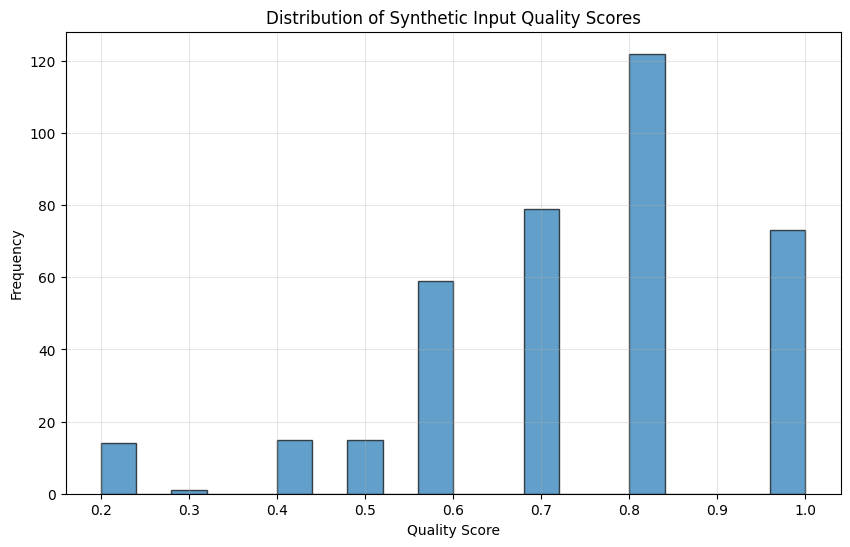

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Load the synthetic dataset
with open('synthetic_dataset_with_urls.json', 'r') as f:
    data = json.load(f)

print(f"Total number of golden entries: {len(data)}")

# Extract synthetic_input_quality scores
quality_scores = [entry['additional_metadata']['synthetic_input_quality'] for entry in data]

# Convert to pandas Series for easier analysis
quality_series = pd.Series(quality_scores)

print("\nSynthetic Input Quality Statistics:")
print(quality_series.describe())

# Distribution analysis
print("\nQuality Score Distribution:")
print(quality_series.value_counts().sort_index())

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(quality_scores, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Synthetic Input Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

Remaining entries at different quality cutoffs:
 cutoff  remaining_count  remaining_percentage
    0.1              378                 100.0
    0.2              378                 100.0
    0.3              363                  96.0
    0.4              363                  96.0
    0.5              348                  92.1
    0.6              333                  88.1
    0.7              195                  51.6
    0.8              195                  51.6
    0.9               73                  19.3
    1.0               73                  19.3


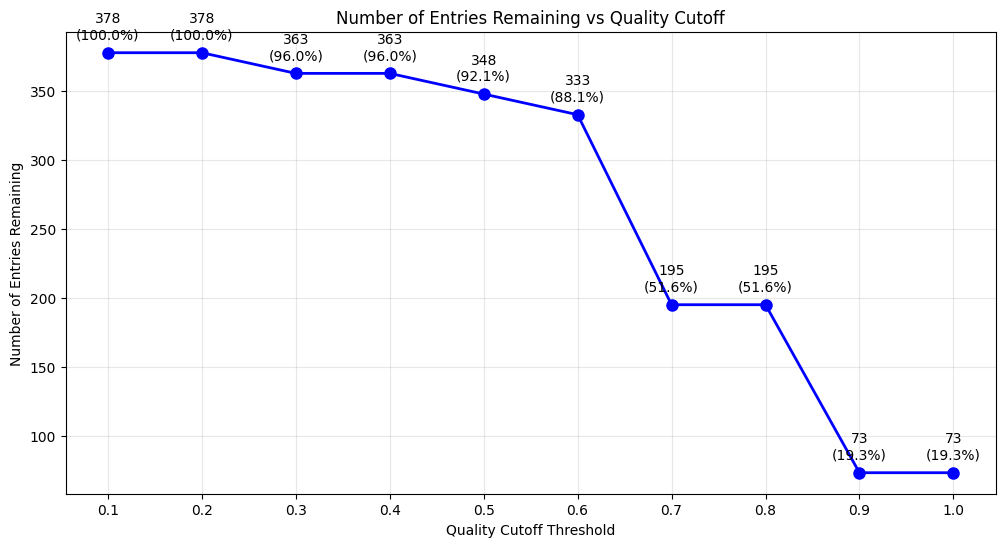

In [2]:
# Function to calculate remaining entries at different quality cutoffs
def analyze_quality_cutoffs(data, cutoffs=None):
    if cutoffs is None:
        # Generate cutoffs from 0.1 to 1.0 in 0.1 increments
        cutoffs = np.arange(0.1, 1.1, 0.1)
    
    quality_scores = [entry['additional_metadata']['synthetic_input_quality'] for entry in data]
    
    results = []
    for cutoff in cutoffs:
        remaining = sum(1 for score in quality_scores if score >= cutoff)
        percentage = (remaining / len(data)) * 100
        results.append({
            'cutoff': cutoff,
            'remaining_count': remaining,
            'remaining_percentage': percentage
        })
    
    return pd.DataFrame(results)

# Analyze with default cutoffs
cutoff_analysis = analyze_quality_cutoffs(data)
print("Remaining entries at different quality cutoffs:")
print(cutoff_analysis.to_string(index=False, float_format='%.1f'))

# Visualize cutoff analysis
plt.figure(figsize=(12, 6))
plt.plot(cutoff_analysis['cutoff'], cutoff_analysis['remaining_count'], 'bo-', linewidth=2, markersize=8)
plt.title('Number of Entries Remaining vs Quality Cutoff')
plt.xlabel('Quality Cutoff Threshold')
plt.ylabel('Number of Entries Remaining')
plt.grid(True, alpha=0.3)
plt.xticks(cutoff_analysis['cutoff'])

# Add value labels on points
for i, row in cutoff_analysis.iterrows():
    plt.annotate(f'{int(row["remaining_count"])}\n({row["remaining_percentage"]:.1f}%)', 
                (row['cutoff'], row['remaining_count']),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

plt.show()

Context Quality Statistics:
count    378.000000
mean       0.567725
std        0.142647
min        0.250000
25%        0.450000
50%        0.550000
75%        0.650000
max        0.900000
dtype: float64


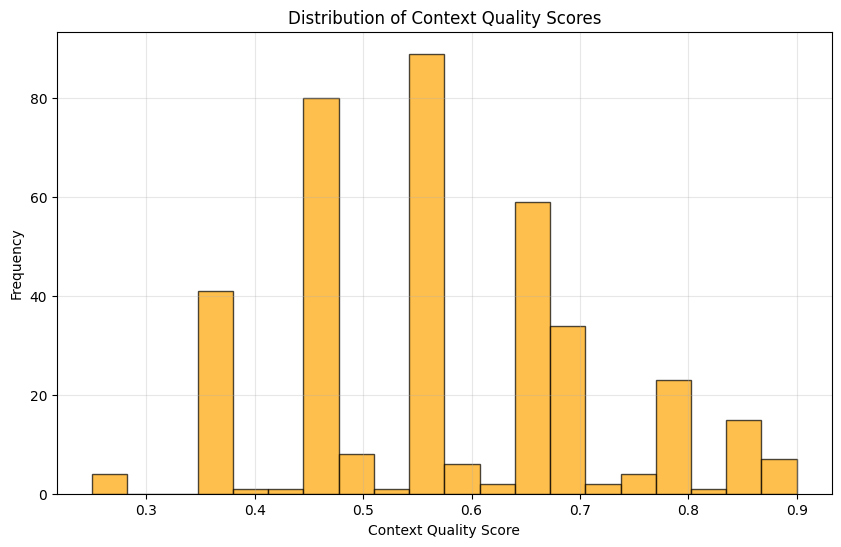


Correlation between synthetic_input_quality and context_quality: 0.306


In [3]:
# Additional analysis: context_quality distribution
context_quality_scores = [entry['additional_metadata']['context_quality'] for entry in data]
context_series = pd.Series(context_quality_scores)

print("Context Quality Statistics:")
print(context_series.describe())

plt.figure(figsize=(10, 6))
plt.hist(context_quality_scores, bins=20, edgecolor='black', alpha=0.7, color='orange')
plt.title('Distribution of Context Quality Scores')
plt.xlabel('Context Quality Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Correlation between synthetic_input_quality and context_quality
correlation = np.corrcoef(quality_scores, context_quality_scores)[0, 1]
print(f"\nCorrelation between synthetic_input_quality and context_quality: {correlation:.3f}")

In [4]:
# Interactive cutoff analyzer
def analyze_custom_cutoff(data, cutoff):
    quality_scores = [entry['additional_metadata']['synthetic_input_quality'] for entry in data]
    remaining = sum(1 for score in quality_scores if score >= cutoff)
    percentage = (remaining / len(data)) * 100
    print(f"At quality cutoff {cutoff}: {remaining} entries remain ({percentage:.1f}% of total)")
    return remaining, percentage

# Example usage - you can change the cutoff value
cutoff = 0.8  # Change this value to test different cutoffs
remaining, percentage = analyze_custom_cutoff(data, cutoff)

# Show some statistics about entries below the cutoff
quality_scores = [entry['additional_metadata']['synthetic_input_quality'] for entry in data]
below_cutoff = [score for score in quality_scores if score < cutoff]
if below_cutoff:
    print(f"\nEntries below cutoff {cutoff}:")
    print(f"  Count: {len(below_cutoff)}")
    print(f"  Min score: {min(below_cutoff):.3f}")
    print(f"  Max score: {max(below_cutoff):.3f}")
    print(f"  Average score: {np.mean(below_cutoff):.3f}")

At quality cutoff 0.8: 195 entries remain (51.6% of total)

Entries below cutoff 0.8:
  Count: 183
  Min score: 0.200
  Max score: 0.700
  Average score: 0.586


## Similarity Analysis

Run `duplicate_analysis.py` from terminal.